## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0,1e-1,25e-2,5e-1,75e-2,1]

In [17]:
results = {}
for drop in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop)
    model.summary()
    print("Experiment with Dropout rate-%s" % (str(drop)))
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = "exp-%s" % (str(drop))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc} 

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)               0  

50000/50000 [==============================] - 3s 66us/step - loss: 0.6694 - accuracy: 0.7583 - val_loss: 1.6900 - val_accuracy: 0.5266
Epoch 47/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.6701 - accuracy: 0.7609 - val_loss: 1.7843 - val_accuracy: 0.5200
Epoch 48/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.6394 - accuracy: 0.7718 - val_loss: 1.7613 - val_accuracy: 0.5247
Epoch 49/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.6298 - accuracy: 0.7723 - val_loss: 1.7724 - val_accuracy: 0.5220
Epoch 50/50
50000/50000 [==============================] - 4s 70us/step - loss: 0.6166 - accuracy: 0.7798 - val_loss: 1.7865 - val_accuracy: 0.5189
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
________________________________________________________

50000/50000 [==============================] - 3s 68us/step - loss: 1.1699 - accuracy: 0.5784 - val_loss: 1.3564 - val_accuracy: 0.5257
Epoch 42/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.1703 - accuracy: 0.5782 - val_loss: 1.3356 - val_accuracy: 0.5302
Epoch 43/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.1544 - accuracy: 0.5847 - val_loss: 1.3514 - val_accuracy: 0.5274
Epoch 44/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.1659 - accuracy: 0.5785 - val_loss: 1.3462 - val_accuracy: 0.5264
Epoch 45/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.1562 - accuracy: 0.5843 - val_loss: 1.3508 - val_accuracy: 0.5264
Epoch 46/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.1529 - accuracy: 0.5835 - val_loss: 1.3522 - val_accuracy: 0.5220
Epoch 47/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.1510 - accuracy: 0.5846 - val_loss: 1.3539

50000/50000 [==============================] - 3s 68us/step - loss: 1.5193 - accuracy: 0.4525 - val_loss: 1.4518 - val_accuracy: 0.4890
Epoch 37/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5052 - accuracy: 0.4585 - val_loss: 1.4811 - val_accuracy: 0.4798
Epoch 38/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.5200 - accuracy: 0.4519 - val_loss: 1.4612 - val_accuracy: 0.4870
Epoch 39/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5138 - accuracy: 0.4566 - val_loss: 1.4655 - val_accuracy: 0.4865
Epoch 40/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5081 - accuracy: 0.4577 - val_loss: 1.4664 - val_accuracy: 0.4833
Epoch 41/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5003 - accuracy: 0.4589 - val_loss: 1.4518 - val_accuracy: 0.4908
Epoch 42/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5034 - accuracy: 0.4597 - val_loss: 1.4678

50000/50000 [==============================] - 3s 68us/step - loss: 1.9565 - accuracy: 0.2532 - val_loss: 1.9883 - val_accuracy: 0.2860
Epoch 32/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9612 - accuracy: 0.2539 - val_loss: 1.9646 - val_accuracy: 0.2867
Epoch 33/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9621 - accuracy: 0.2504 - val_loss: 2.0049 - val_accuracy: 0.2691
Epoch 34/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9598 - accuracy: 0.2525 - val_loss: 2.0497 - val_accuracy: 0.2268
Epoch 35/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9640 - accuracy: 0.2462 - val_loss: 2.0282 - val_accuracy: 0.2655
Epoch 36/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9544 - accuracy: 0.2564 - val_loss: 1.9406 - val_accuracy: 0.3068
Epoch 37/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9584 - accuracy: 0.2561 - val_loss: 2.0373

50000/50000 [==============================] - 4s 71us/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 25/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.3027 - accuracy: 0.0961 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 26/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 27/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.3027 - accuracy: 0.0948 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 28/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.3027 - accuracy: 0.0957 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 29/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 30/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3026

50000/50000 [==============================] - 3s 69us/step - loss: 1.1429 - accuracy: 0.5912 - val_loss: 1.3784 - val_accuracy: 0.5217
Epoch 20/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.1239 - accuracy: 0.5969 - val_loss: 1.4148 - val_accuracy: 0.5063
Epoch 21/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.1061 - accuracy: 0.6036 - val_loss: 1.3810 - val_accuracy: 0.5197
Epoch 22/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.0819 - accuracy: 0.6119 - val_loss: 1.3620 - val_accuracy: 0.5299
Epoch 23/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.0660 - accuracy: 0.6183 - val_loss: 1.3865 - val_accuracy: 0.5181
Epoch 24/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.0613 - accuracy: 0.6191 - val_loss: 1.3732 - val_accuracy: 0.5256
Epoch 25/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.0285 - accuracy: 0.6333 - val_loss: 1.3623

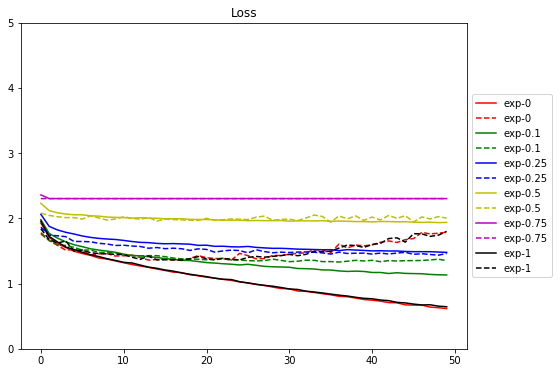

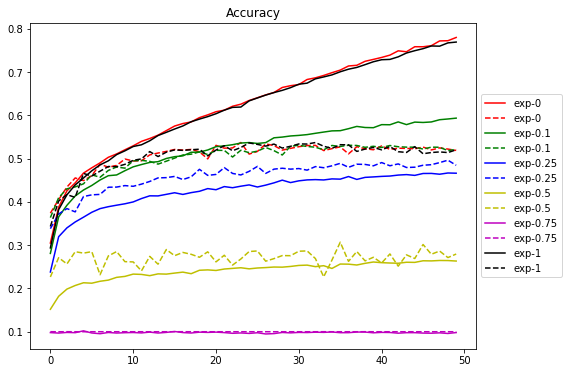

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","c","lime","tomato"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
#plt.legend(handles=[line_up, line_down])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
#plt.legend()
plt.show()